In [53]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import time
import pyproj
import cartopy.crs as ccrs

# TODO: add a function to preprocess_cesm_data that saves the 80x80 SPS grid to this location
sps_grid = xr.open_dataset("/oak/stanford/groups/earlew/yuchen/cesm_lens/grids/80x80_SPS_grid.nc")

cmap = plt.cm.RdBu_r
white_region_fraction = 0.02
colors = cmap(np.linspace(0, 1, 256))
center = 128
white_width = int(white_region_fraction * 256)
colors[center - white_width // 2:center + white_width // 2] = [1, 1, 1, 1]
RdBu_rw = mcolors.LinearSegmentedColormap.from_list('RdBu_r_with_white', colors)



In [39]:
da = xr.open_dataset("/scratch/users/yucli/UNetRes3_mini_experiment_5_ens_members_test_predictions.nc").predictions

truth_ds_list = []
for member_id in da.member_id.values:
    ds = xr.open_dataset(f"/scratch/users/yucli/model-ready_cesm_data/data_pairs_setting1/targets_member_{member_id}.nc")
    truth_ds_list.append(ds)

truth_da = xr.concat(truth_ds_list, dim="member_id").data

Text(0.5, 0.98, 'Init month = 2004-3')

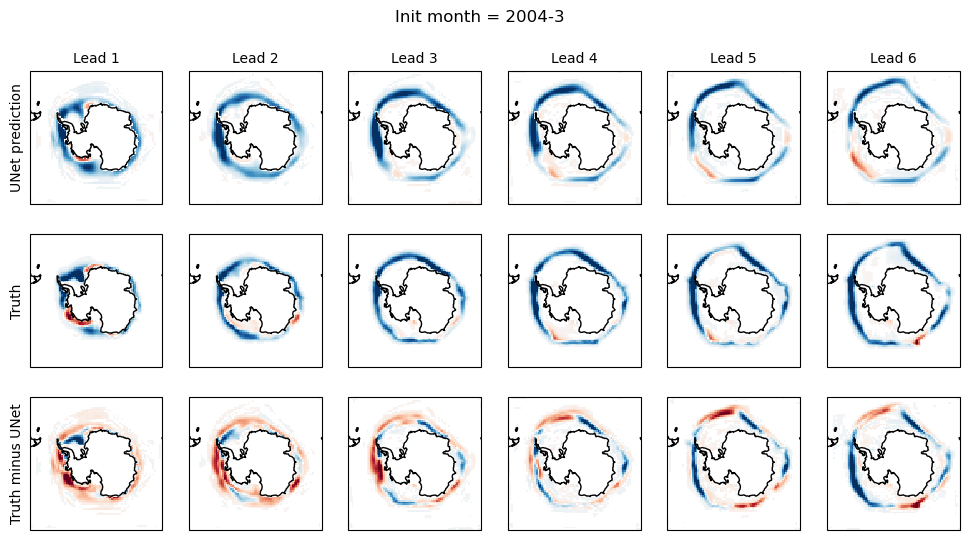

In [70]:
da_sample = da.isel(start_prediction_time=86+24, member_id=0)
truth_da_sample = truth_da.sel(start_prediction_month=da_sample.start_prediction_time.data).isel(member_id=0)

xgrid = sps_grid.x / 1e6
ygrid = sps_grid.y / 1e6

lon = sps_grid.lon.data
lat = sps_grid.lat.data

fig, axs = plt.subplots(figsize=(12,6), nrows=3, ncols=6, 
                        sharex=True, sharey=True, 
                        subplot_kw={'projection': ccrs.SouthPolarStereo()})
contour_colors = np.arange(-0.4, 0.45, 0.05)

for i in range(6):
    axs[0,i].pcolormesh(lon, lat, 
                    da_sample.isel(lead_time=i), 
                    transform=ccrs.PlateCarree(), 
                    cmap=RdBu_rw, vmin=-0.4, vmax=0.4)

    axs[1,i].pcolormesh(lon, lat, 
                    truth_da_sample.isel(lead_time=i), 
                    transform=ccrs.PlateCarree(), 
                    cmap=RdBu_rw, vmin=-0.4, vmax=0.4)

    axs[2,i].pcolormesh(lon, lat, 
                    truth_da_sample.isel(lead_time=i) - da_sample.isel(lead_time=i), 
                    transform=ccrs.PlateCarree(), 
                    cmap=RdBu_rw, vmin=-0.4, vmax=0.4)

    for j in range(3):
        axs[j,i].coastlines()
        axs[j,i].set_yticks([])

    axs[1,i].set_xticks([])    
    axs[0,i].set_title(f"Lead {i+1}", fontsize=10)

axs[0,0].set_ylabel("UNet prediction")
axs[1,0].set_ylabel("Truth")
axs[2,0].set_ylabel("Truth minus UNet")
init_month = pd.to_datetime(da_sample.start_prediction_time.data)
plt.suptitle(f"Init month = {init_month.year}-{init_month.month}")
#plt.savefig(f"../figures/cesm/initial_experiment/anomaly_prediction_example_2_march.jpg", dpi=300, bbox_inches='tight')

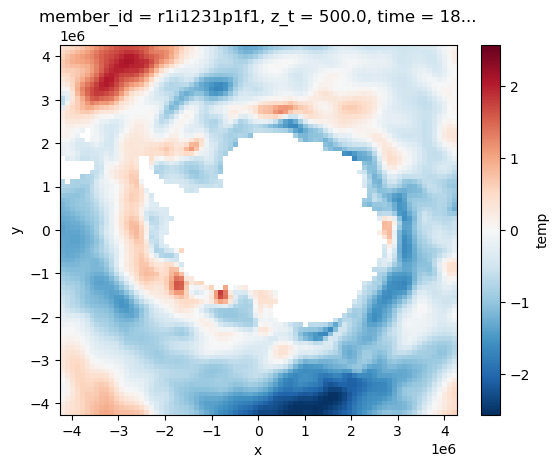

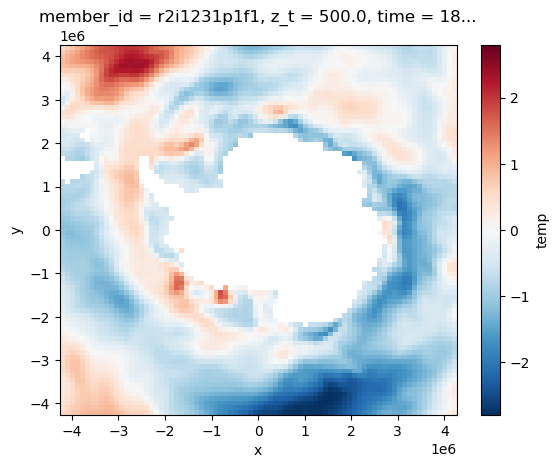

In [85]:
temp = xr.open_dataset("/scratch/users/yucli/cesm_data/normalized_inputs/temp_norm.nc").temp

temp.sel(member_id="r1i1231p1f1").isel(time=0).plot()
plt.show()
temp.sel(member_id="r2i1231p1f1").isel(time=0).plot()
plt.show()

In [29]:
print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=1)

for data in dataloader: 
    data_sample = data
    break

Train samples: 139320
Validation samples: 16200
Test samples: 20520


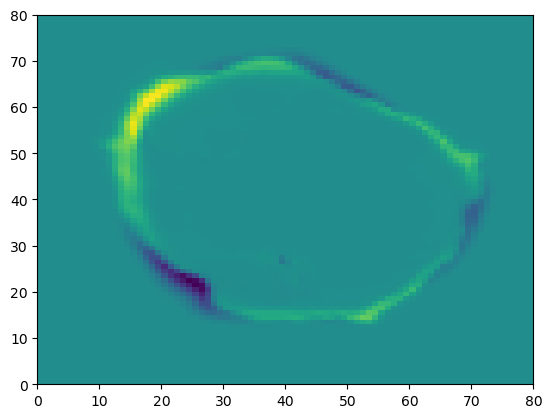

In [47]:
plt.pcolormesh(data_sample["target"][0,5])